In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")  

In [2]:
df=pd.read_csv('D:/program session/project/House_rent/train.csv')
df.head(2)

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9/10/2017 12:48,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0


# Analysis of Dataset

In [3]:
#finding the column names
df.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

In [4]:
#Basic statistical analysis of dataset
df.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
count,20532.000000,20532.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000
mean,12.945748,77.637295,0.227049,0.362053,0.174848,0.711603,1062.017465,5.769920,1.858465,4.549922,1.874050,3.801335,1.149523,19056.733148
std,0.029601,0.110525,0.418935,0.480606,0.379846,0.453028,591.207446,6.350989,0.710926,335.154787,2.183982,3.183697,0.993549,8434.029016
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000
25%,12.918176,77.572068,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000
50%,12.943790,77.633506,0.000000,0.000000,0.000000,1.000000,1047.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000
75%,12.970979,77.695723,0.000000,1.000000,0.000000,1.000000,1285.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,25.000000,26.000000,13.000000,50000.000000


In [5]:
# checking for the data is balanced or not
df['rent'].value_counts()

rent
15000.0    1341
20000.0    1338
25000.0    1093
12000.0    1046
18000.0    1007
           ... 
11200.0       1
14600.0       1
16600.0       1
13750.0       1
23150.0       1
Name: count, Length: 206, dtype: int64

# Data Cleaning¶

## Missing Value

In [6]:
df.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [7]:
#df.fillna(0, inplace=True)

df=df.dropna()

In [8]:
df.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

## Wrong Formate

In [9]:
df.dtypes

id                  object
type                object
locality            object
activation_date     object
latitude           float64
longitude          float64
lease_type          object
gym                  int64
lift                 int64
swimming_pool        int64
negotiable           int64
furnishing          object
parking             object
property_size        int64
property_age       float64
bathroom           float64
facing              object
cup_board          float64
floor              float64
total_floor        float64
amenities           object
water_supply        object
building_type       object
balconies          float64
rent               float64
dtype: object

In [10]:
pd.set_option('display.max_columns',None)
df.head(2)

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9/10/2017 12:48,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12/6/2018 22:02,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0


In [11]:
df['bathroom'] = df['bathroom'].astype(int)
df['floor'] = df['floor'].astype(int)
df['total_floor'] = df['total_floor'].astype(int)
df['balconies'] = df['balconies'].astype(int)
df['cup_board'] = df['cup_board'].astype(int)

In [12]:
df.drop(columns = ['id','activation_date','amenities'],inplace=True)

In [13]:
df.head(2)

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
1,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2,NE,2,3,4,CORPORATION,AP,2,22000.0
2,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3,E,3,1,5,CORP_BORE,AP,3,28000.0


In [14]:
df.dtypes

type              object
locality          object
latitude         float64
longitude        float64
lease_type        object
gym                int64
lift               int64
swimming_pool      int64
negotiable         int64
furnishing        object
parking           object
property_size      int64
property_age     float64
bathroom           int32
facing            object
cup_board          int32
floor              int32
total_floor        int32
water_supply      object
building_type     object
balconies          int32
rent             float64
dtype: object

## Duplicate

In [15]:
df.duplicated().sum()

22

In [16]:
df = df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

## Text_Errors

In [18]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['type',
 'locality',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'water_supply',
 'building_type']

In [19]:
df['type'].value_counts()

type
BHK2        11582
BHK3         4353
BHK1         3576
RK1           550
BHK4          232
BHK4PLUS       30
bhk2           16
bhk3           12
1BHK1           4
Name: count, dtype: int64

In [20]:
df['type'] = df['type'].replace({'bhk2':'BHK2','bhk3':'BHK3','1BHK1':'BHK1','BHK4':'BHK4PLUS'})

In [21]:
df['type'].value_counts()

type
BHK2        11598
BHK3         4365
BHK1         3580
RK1           550
BHK4PLUS      262
Name: count, dtype: int64

In [22]:
df['locality'].value_counts()

locality
Whitefield                                                                                        900
HSR Layout                                                                                        682
Banashankari                                                                                      644
Marathahalli                                                                                      473
Mahadevapura                                                                                      432
                                                                                                 ... 
Simhadri layout                                                                                     1
Skylark Esta, Seetharampalya, Bengaluru, Karnataka, India                                           1
23d, 2nd A Cross Rd, Srinivasnagar, Banashankari, Bengaluru, Karnataka 560050, India,Bengaluru      1
Wilson Garden,                                                           

In [23]:
df['lease_type'].value_counts()

lease_type
FAMILY      10100
ANYONE       9613
BACHELOR      584
COMPANY        58
Name: count, dtype: int64

In [24]:
df['furnishing'].value_counts()

furnishing
SEMI_FURNISHED     17765
NOT_FURNISHED       1424
FULLY_FURNISHED     1166
Name: count, dtype: int64

In [25]:
df['parking'].value_counts()

parking
BOTH            10715
TWO_WHEELER      7169
FOUR_WHEELER     1436
NONE             1035
Name: count, dtype: int64

In [26]:
df['facing'].value_counts()

facing
E     9445
N     5880
W     2608
S     1211
NE     810
SE     193
NW     149
SW      59
Name: count, dtype: int64

In [27]:
df['water_supply'].value_counts()

water_supply
CORP_BORE      10608
CORPORATION     6684
BOREWELL        3063
Name: count, dtype: int64

In [28]:
df['building_type'].value_counts()

building_type
IF    9192
AP    8778
IH    2368
GC      17
Name: count, dtype: int64

# Outlier

In [29]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['latitude', 'longitude', 'property_age', 'rent']

In [30]:
int64= [var for var in df.columns if df[var].dtype == 'int64']
int64

['gym', 'lift', 'swimming_pool', 'negotiable', 'property_size']

In [31]:
int32= [var for var in df.columns if df[var].dtype == 'int32']
int32

['bathroom', 'cup_board', 'floor', 'total_floor', 'balconies']

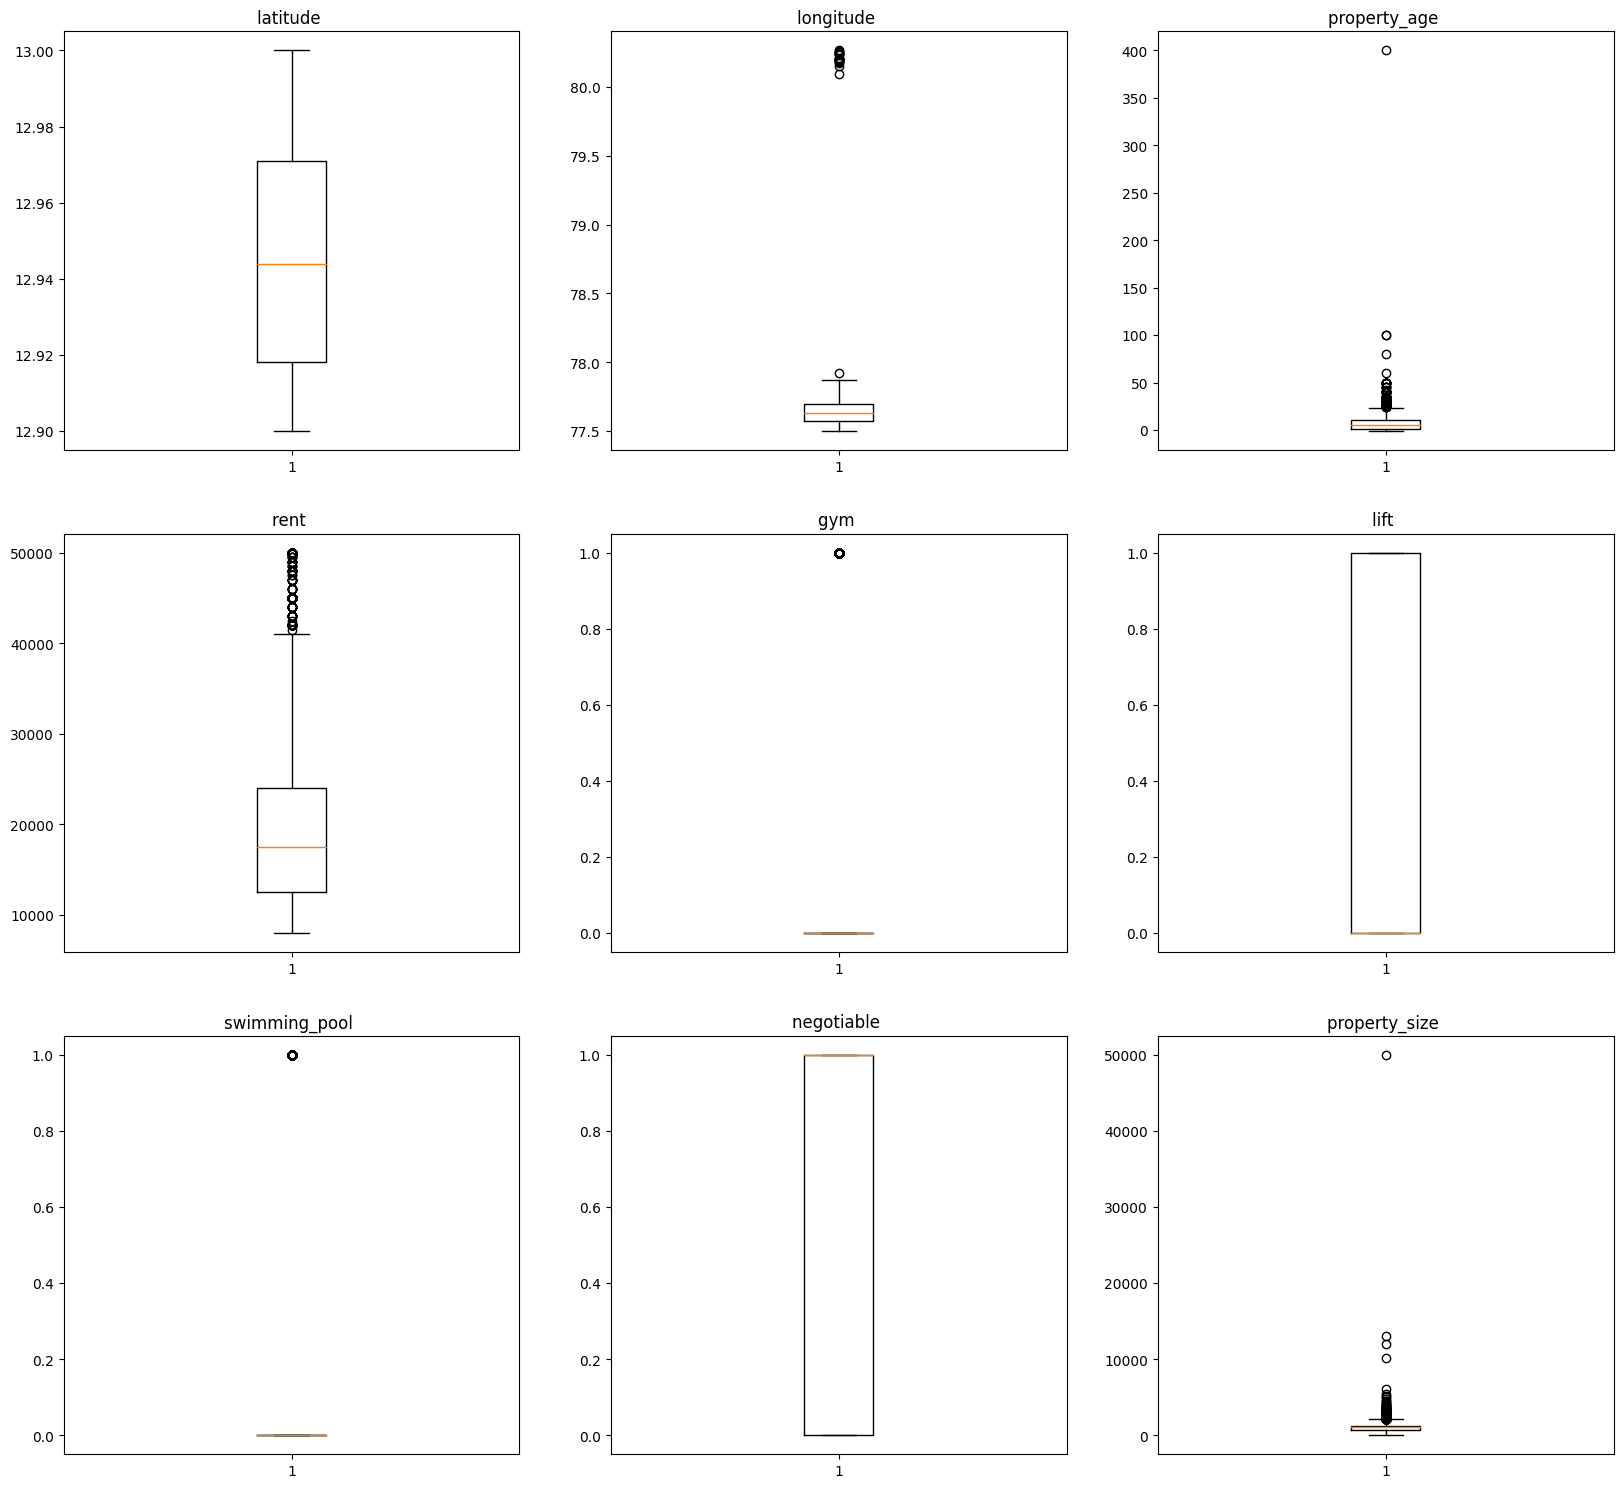

In [32]:
plt.figure(figsize=(20, 25))

plt.subplot(431)
plt.boxplot(df['latitude'] )
plt.title('latitude ')

plt.subplot(432)
plt.boxplot(df['longitude'] )
plt.title('longitude ')

plt.subplot(433)
plt.boxplot(df['property_age'] )
plt.title('property_age ')

plt.subplot(434)
plt.boxplot(df['rent'] )
plt.title('rent ')

plt.subplot(435)
plt.boxplot(df['gym'] )
plt.title('gym ')

plt.subplot(436)
plt.boxplot(df['lift'] )
plt.title('lift ')

plt.subplot(437)
plt.boxplot(df['swimming_pool'] )
plt.title('swimming_pool ')

plt.subplot(438)
plt.boxplot(df['negotiable'] )
plt.title('negotiable ')

plt.subplot(439)
plt.boxplot(df['property_size'] )
plt.title('property_size ')

# show plot
plt.show()

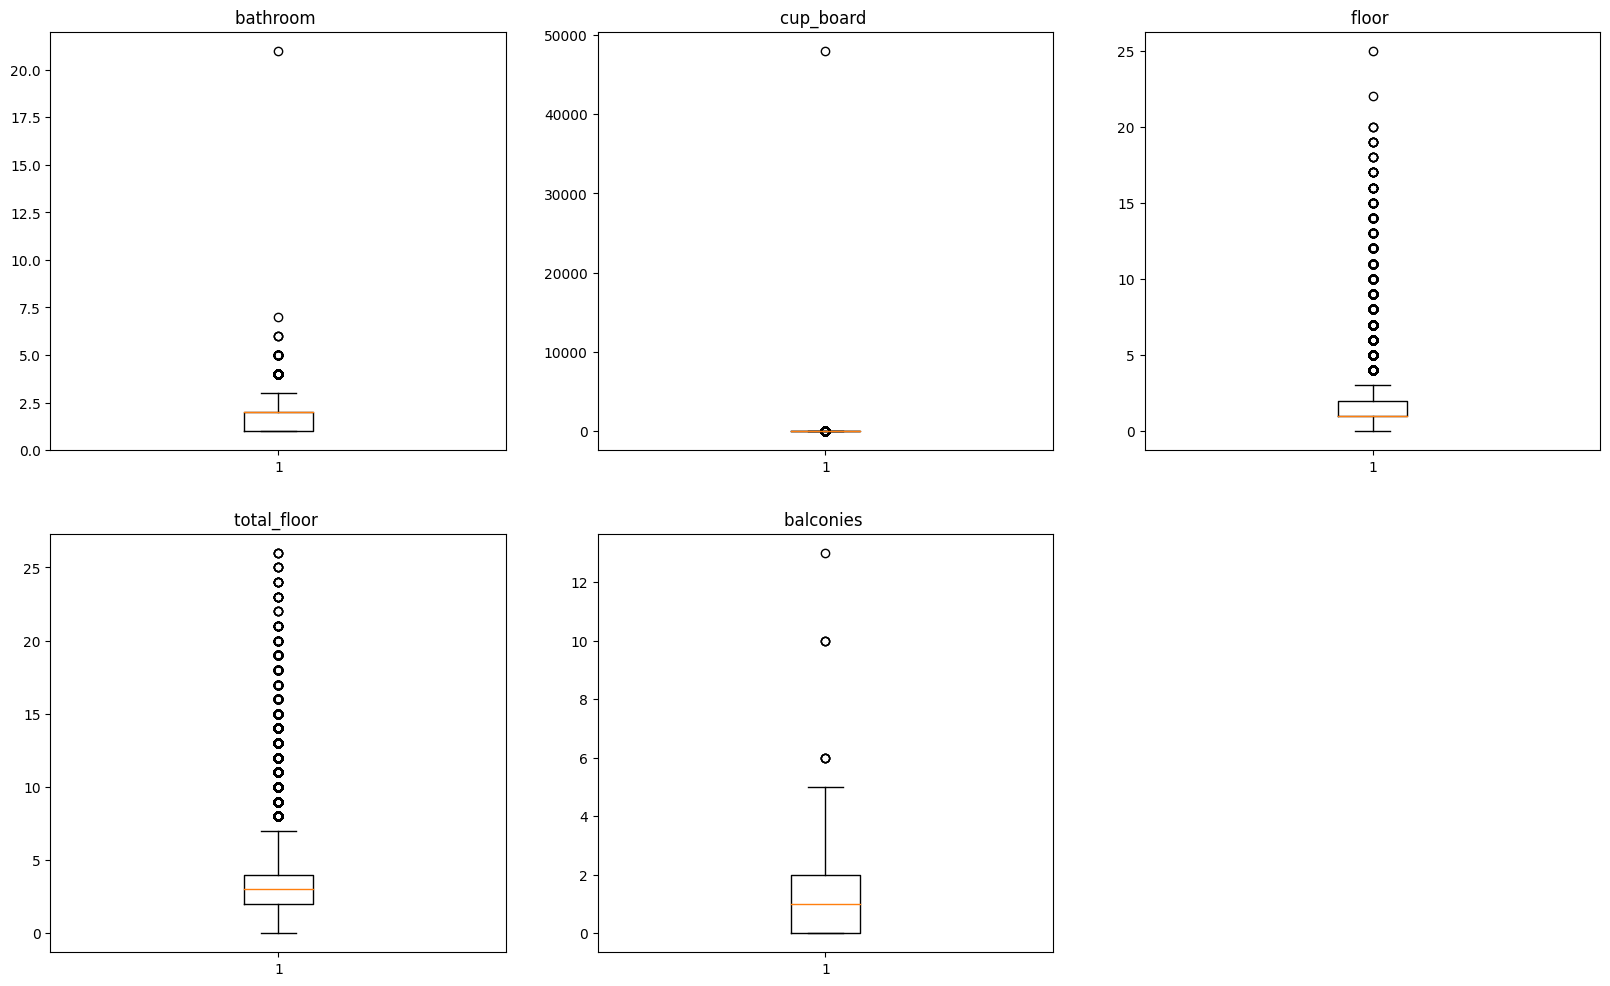

In [33]:
plt.figure(figsize=(20, 25))

plt.subplot(431)
plt.boxplot(df['bathroom'] )
plt.title('bathroom ')

plt.subplot(432)
plt.boxplot(df['cup_board'] )
plt.title('cup_board ')

plt.subplot(433)
plt.boxplot(df['floor'] )
plt.title('floor ')

plt.subplot(434)
plt.boxplot(df['total_floor'] )
plt.title('total_floor ')

plt.subplot(435)
plt.boxplot(df['balconies'] )
plt.title('balconies ')


# show plot
plt.show()


In [34]:
Q1 = df['latitude'].quantile(0.25)
Q3 = df['latitude'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.latitude = df.latitude.clip(lower_bound , upper_bound)

In [35]:
Q1 = df['longitude'].quantile(0.25)
Q3 = df['longitude'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.longitude = df.longitude.clip(lower_bound , upper_bound)

In [36]:
Q1 = df['property_age'].quantile(0.25)
Q3 = df['property_age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.property_age = df.property_age.clip(lower_bound , upper_bound)

In [37]:
Q1 = df['rent'].quantile(0.25)
Q3 = df['rent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.rent = df.rent.clip(lower_bound , upper_bound)

In [38]:
Q1 = df['gym'].quantile(0.25)
Q3 = df['gym'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.gym = df.gym.clip(lower_bound , upper_bound)

In [39]:
Q1 = df['lift'].quantile(0.25)
Q3 = df['lift'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.lift = df.lift.clip(lower_bound , upper_bound)

In [40]:
Q1 = df['swimming_pool'].quantile(0.25)
Q3 = df['swimming_pool'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.swimming_pool = df.swimming_pool.clip(lower_bound , upper_bound)

In [41]:
Q1 = df['negotiable'].quantile(0.25)
Q3 = df['negotiable'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.negotiable = df.negotiable.clip(lower_bound , upper_bound)

In [42]:
Q1 = df['property_size'].quantile(0.25)
Q3 = df['property_size'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.property_size = df.property_size.clip(lower_bound , upper_bound)

In [43]:
Q1 = df['bathroom'].quantile(0.25)
Q3 = df['bathroom'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.bathroom = df.bathroom.clip(lower_bound , upper_bound)

In [44]:
Q1 = df['cup_board'].quantile(0.25)
Q3 = df['cup_board'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.cup_board = df.cup_board.clip(lower_bound , upper_bound)

In [45]:
Q1 = df['floor'].quantile(0.25)
Q3 = df['floor'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.floor = df.floor.clip(lower_bound , upper_bound)

In [46]:
Q1 = df['total_floor'].quantile(0.25)
Q3 = df['total_floor'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.total_floor = df.total_floor.clip(lower_bound , upper_bound)

In [47]:
Q1 = df['balconies'].quantile(0.25)
Q3 = df['balconies'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.balconies = df.balconies.clip(lower_bound , upper_bound)

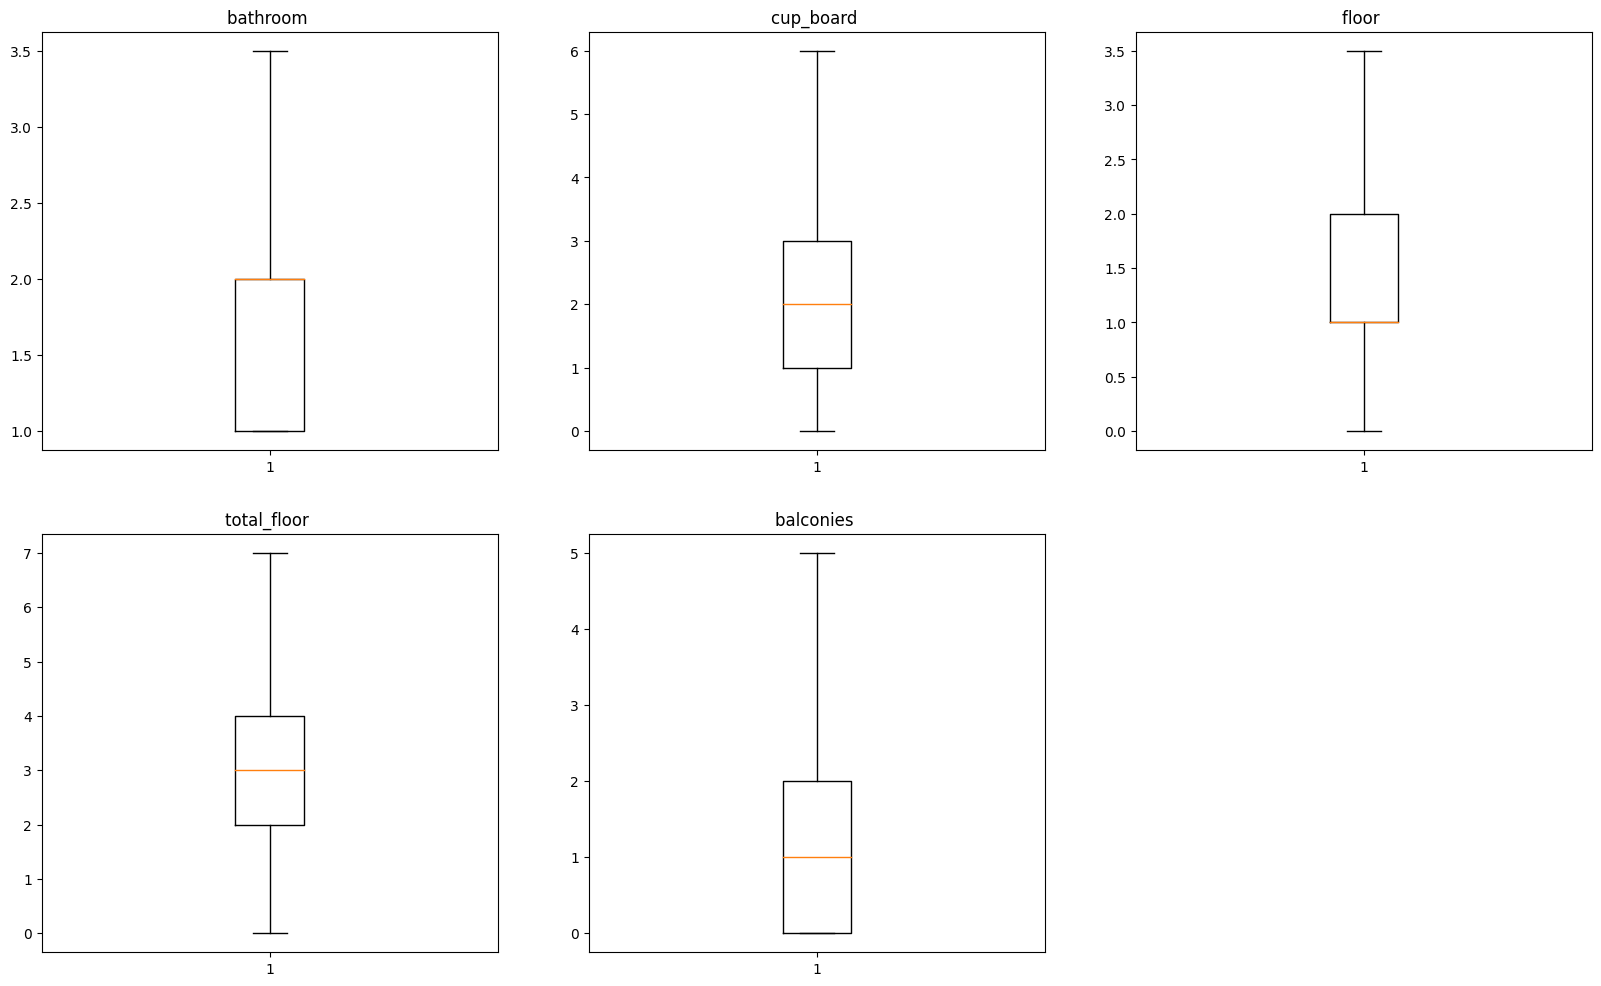

In [48]:
plt.figure(figsize=(20, 25))

plt.subplot(431)
plt.boxplot(df['bathroom'] )
plt.title('bathroom ')

plt.subplot(432)
plt.boxplot(df['cup_board'] )
plt.title('cup_board ')

plt.subplot(433)
plt.boxplot(df['floor'] )
plt.title('floor ')

plt.subplot(434)
plt.boxplot(df['total_floor'] )
plt.title('total_floor ')

plt.subplot(435)
plt.boxplot(df['balconies'] )
plt.title('balconies ')


# show plot
plt.show()

# Eda (Exploratary Data Analysis)

## Feature Vs Target (Categorical Data )¶

In [49]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['type',
 'locality',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'water_supply',
 'building_type']

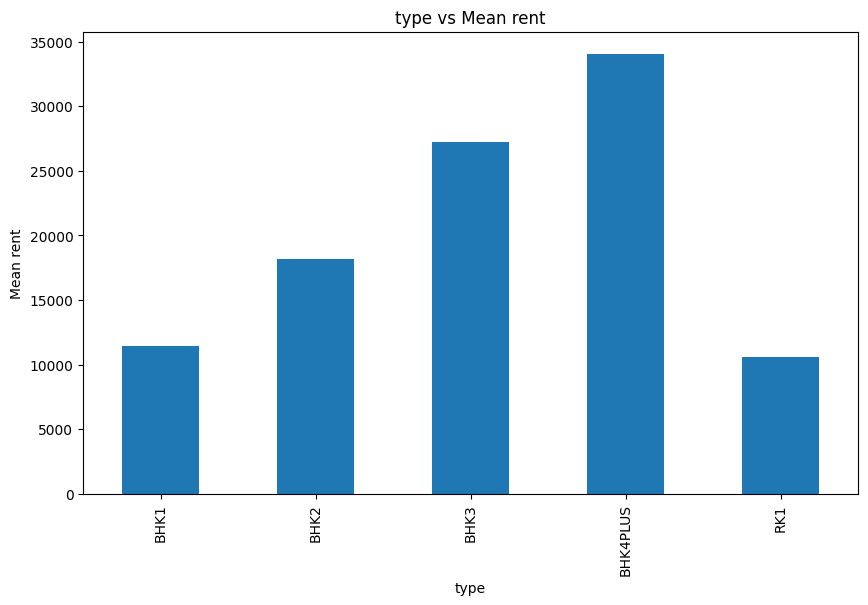

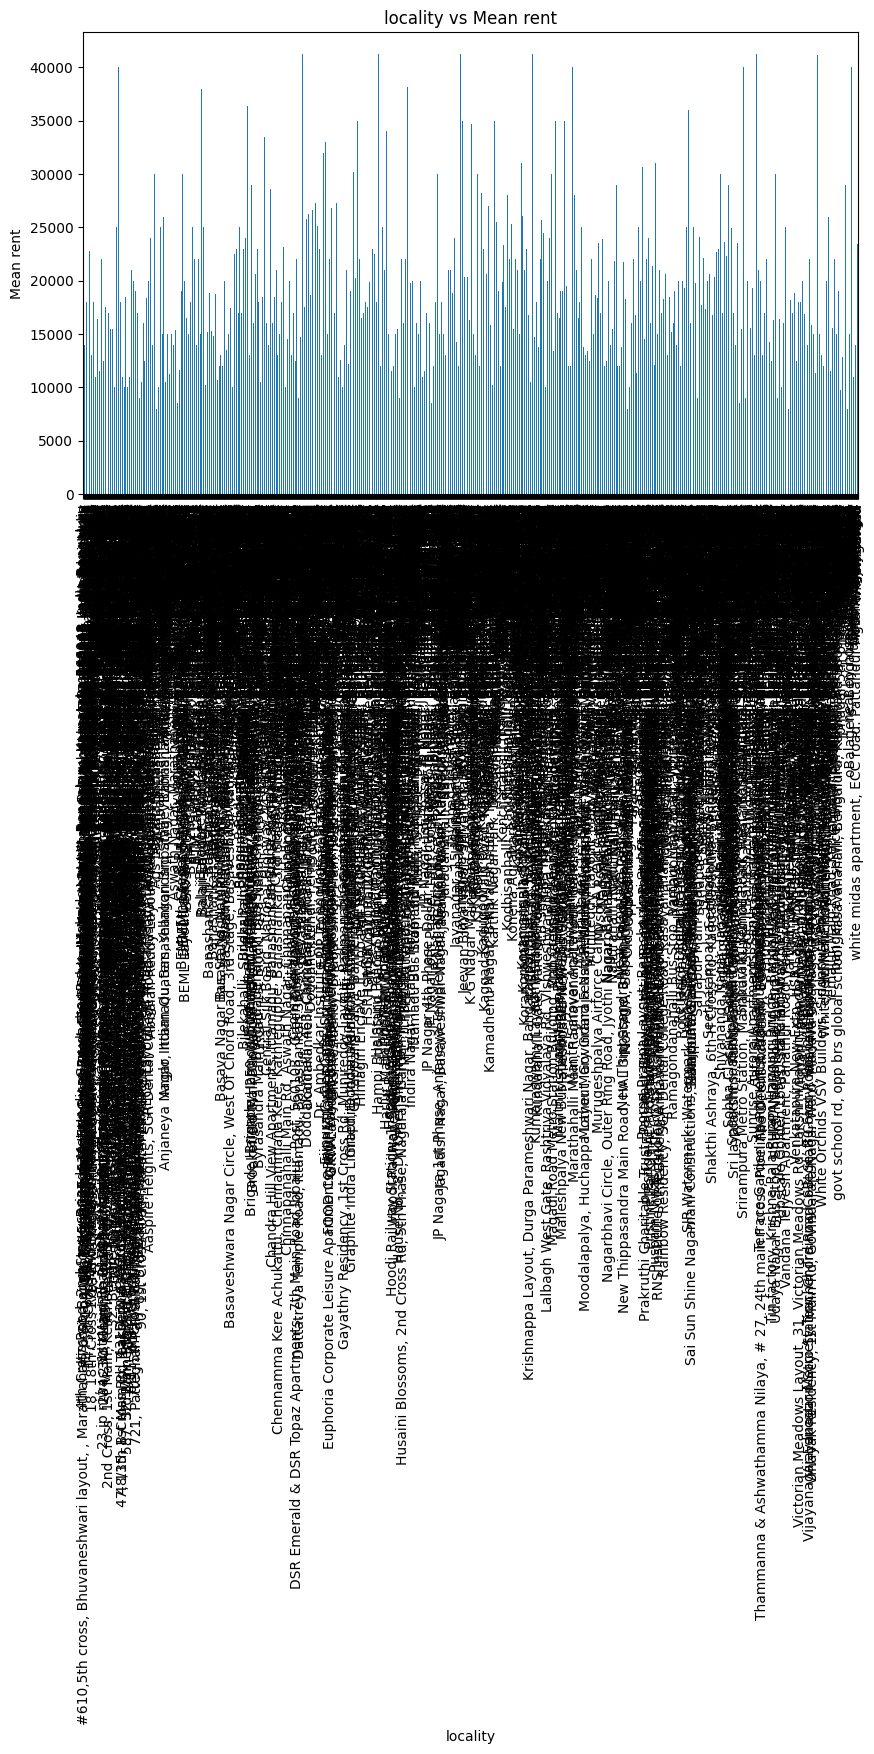

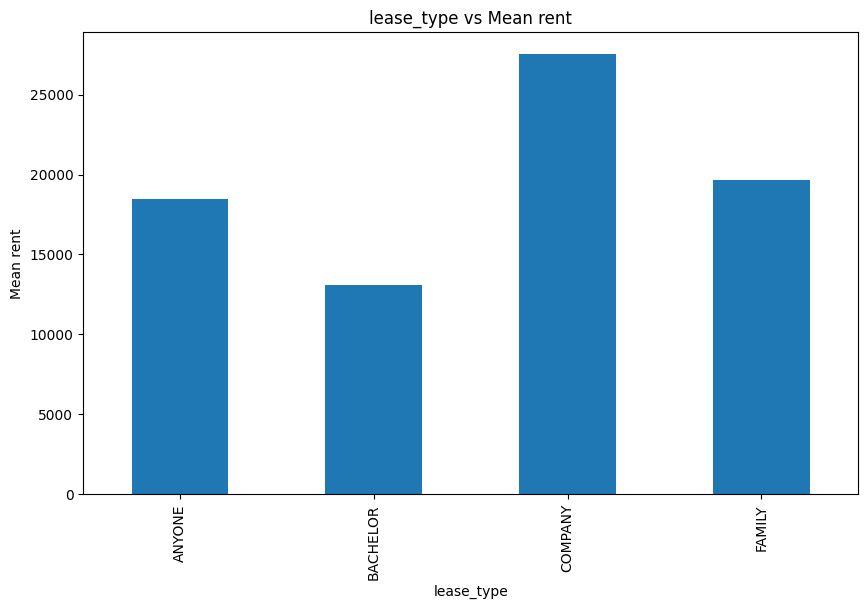

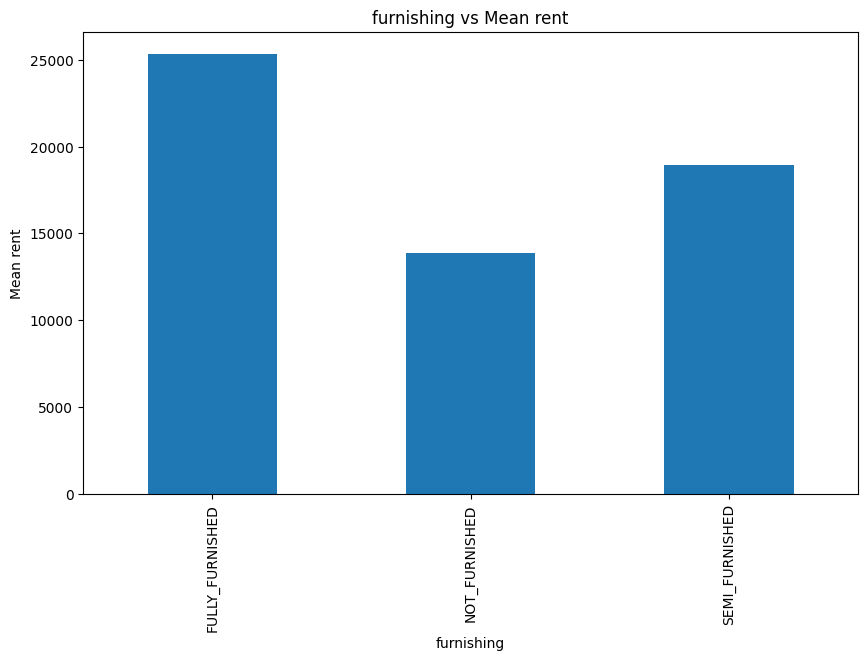

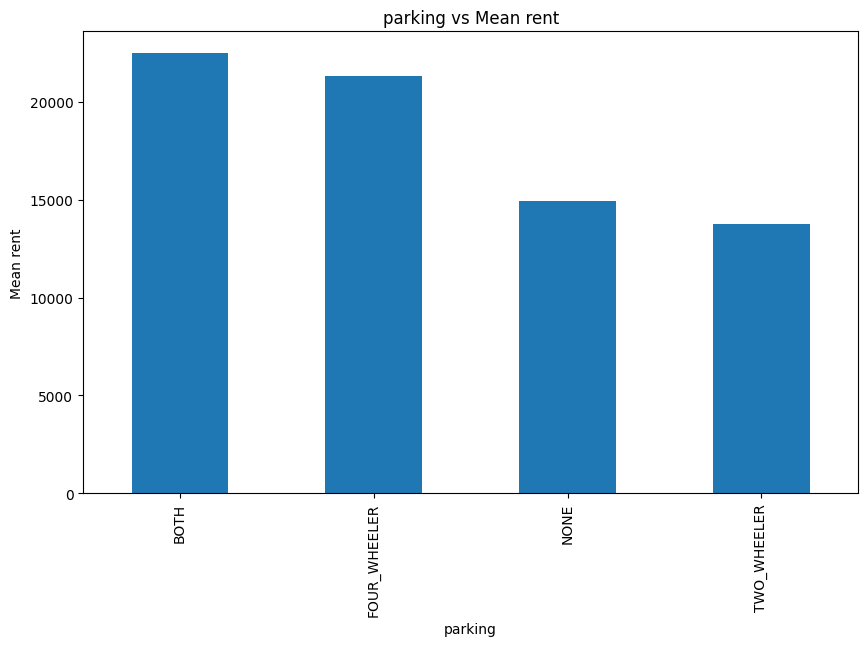

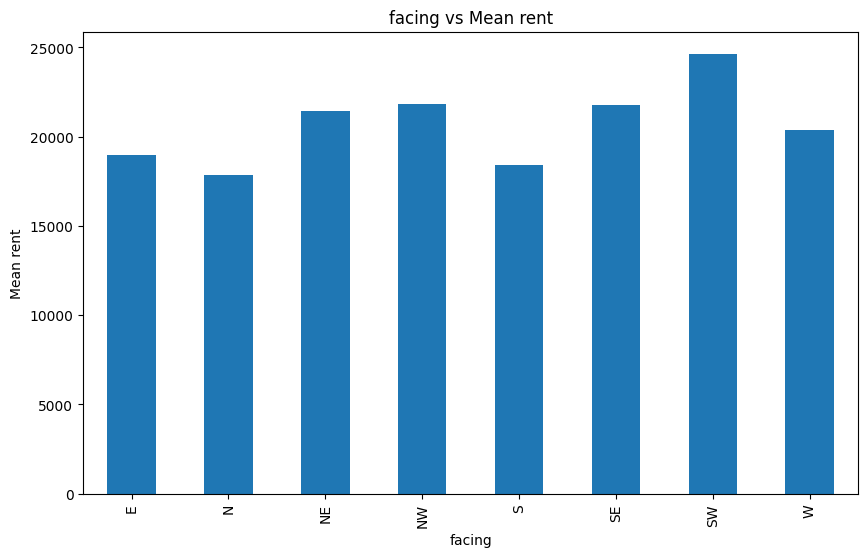

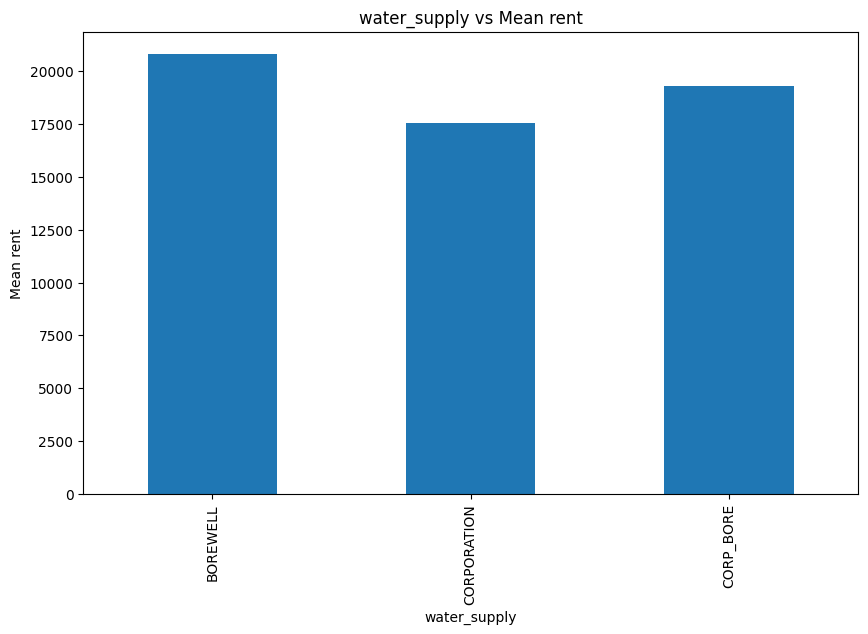

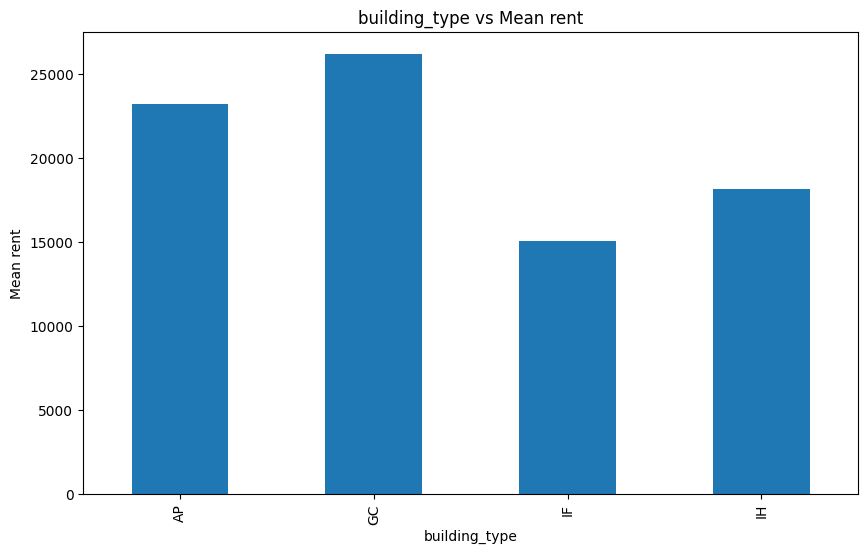

In [50]:
features = [
    'type',
 'locality',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'water_supply',
 'building_type'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['rent'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean rent')
    plt.title(f'{feature} vs Mean rent')
    plt.show()

## Feature Vs Target (Condinues Data )

In [51]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['latitude', 'longitude', 'property_age', 'bathroom', 'floor', 'rent']

In [52]:
int64= [var for var in df.columns if df[var].dtype == 'int64']
int64

['gym', 'lift', 'swimming_pool', 'negotiable', 'property_size']

In [53]:
int32= [var for var in df.columns if df[var].dtype == 'int32']
int32

['cup_board', 'total_floor', 'balconies']

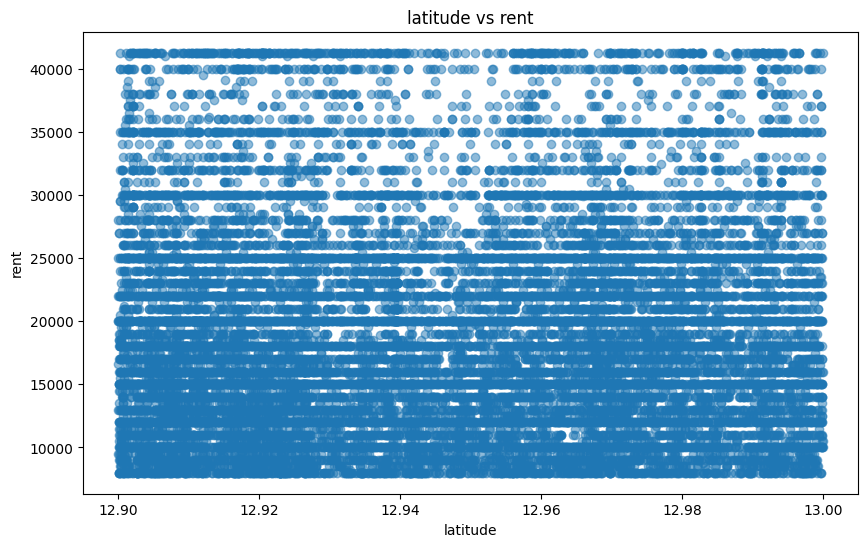

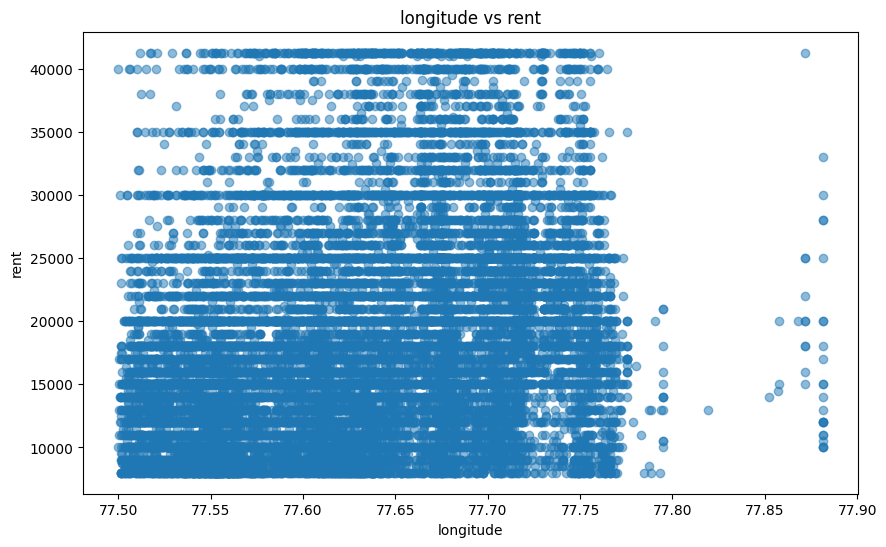

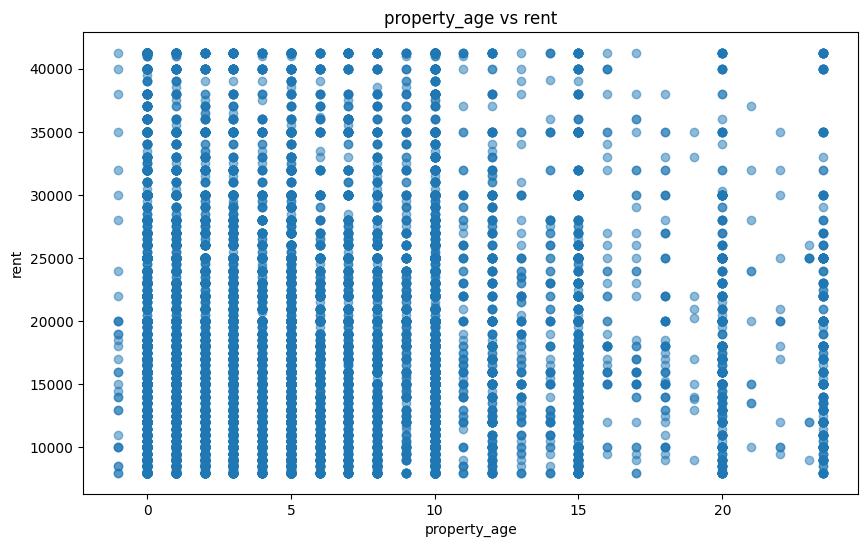

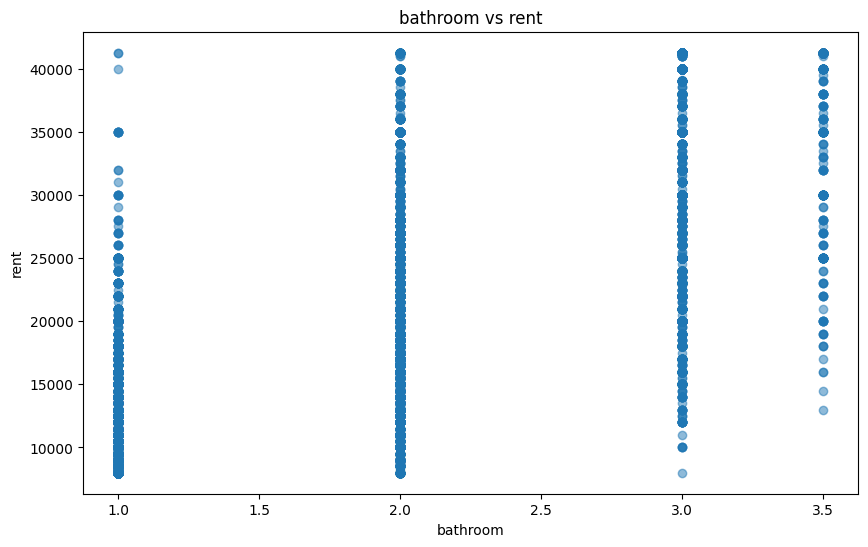

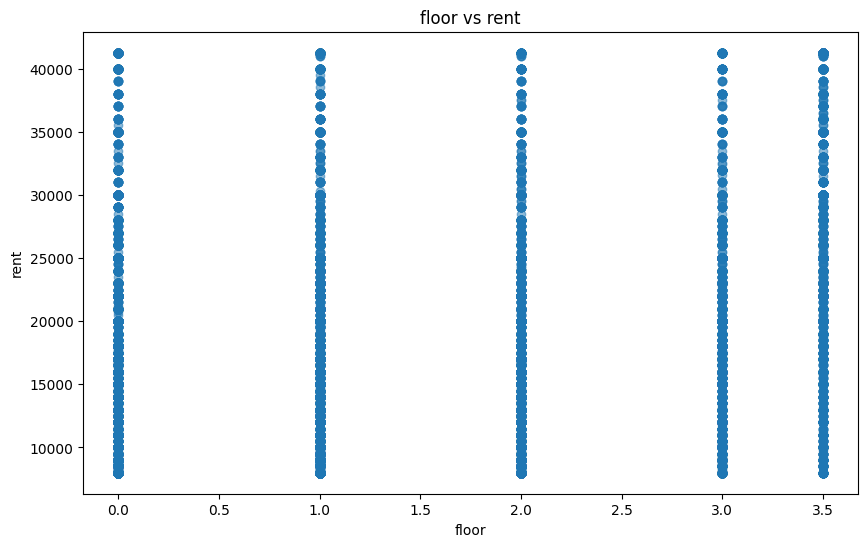

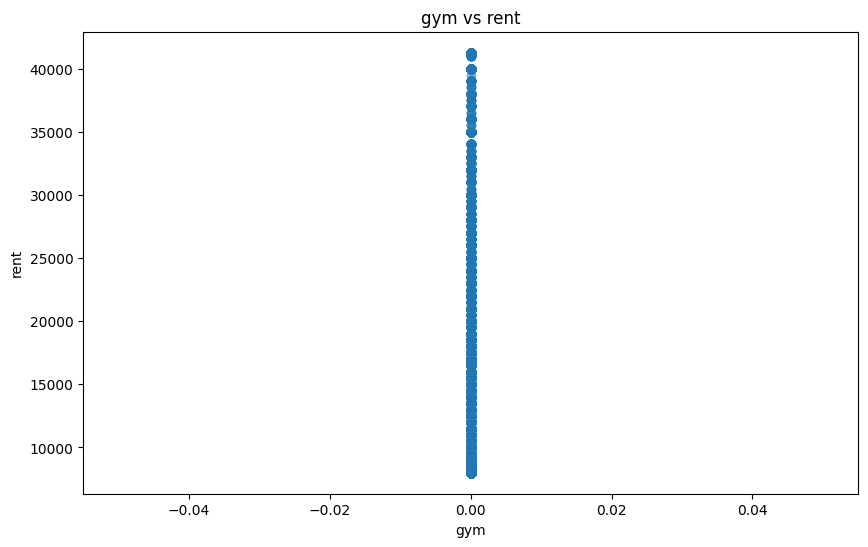

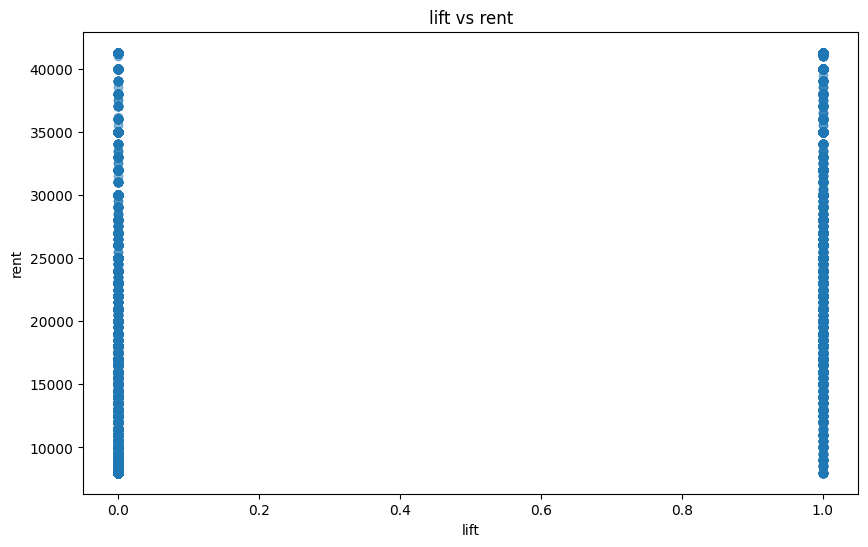

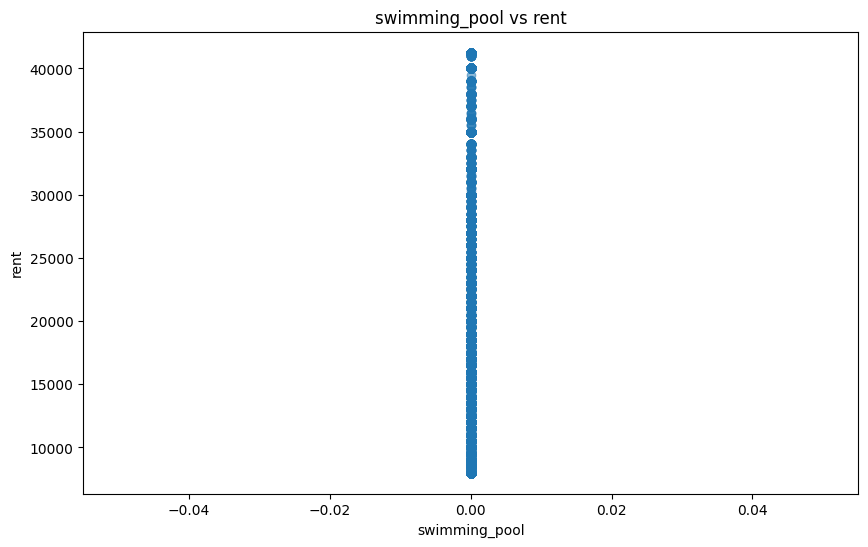

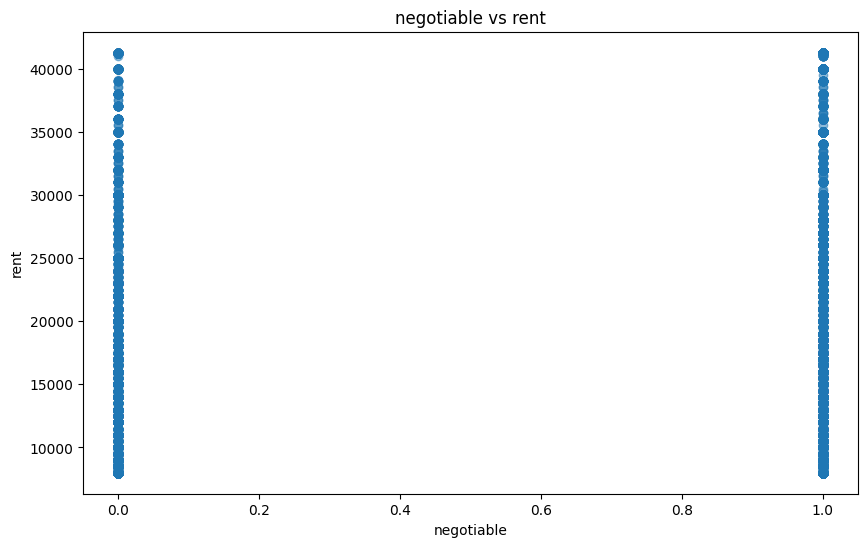

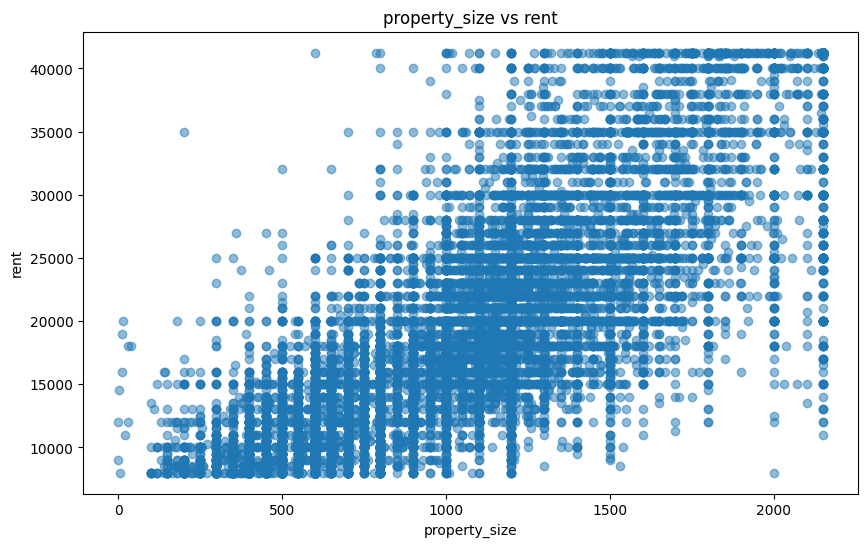

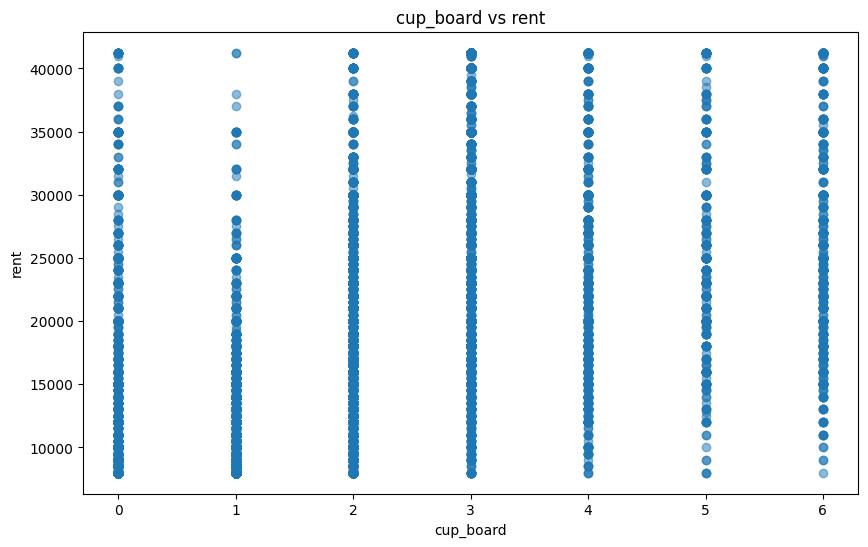

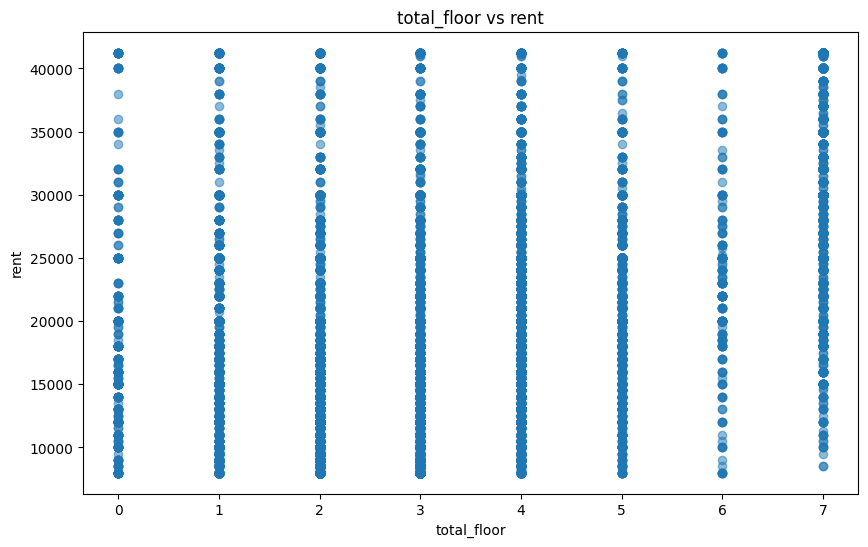

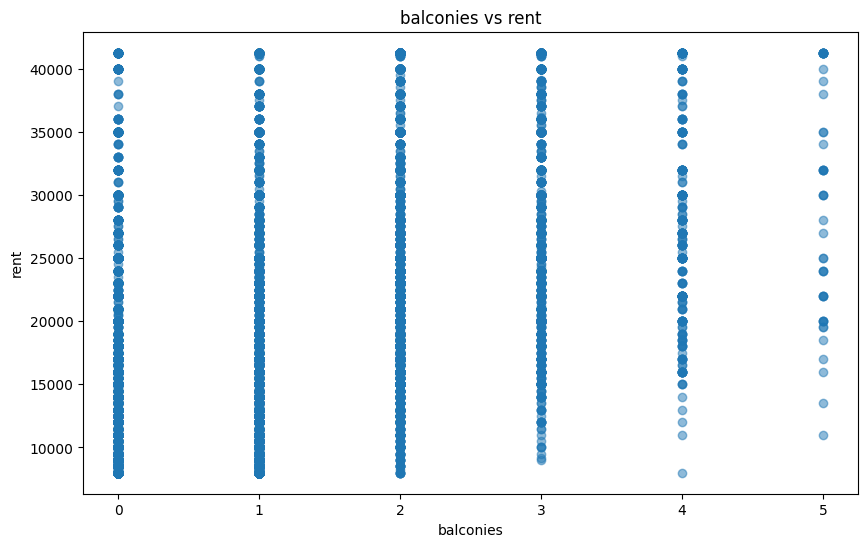

In [54]:
features = ['latitude', 'longitude', 'property_age', 'bathroom', 'floor', 'gym', 'lift', 'swimming_pool', 'negotiable', 'property_size','cup_board', 'total_floor', 'balconies']
target = 'rent'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

In [55]:
del df['locality']

# Encoding

In [56]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['type',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'water_supply',
 'building_type']

In [57]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [58]:
ordinal_cols = ['type',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'water_supply',
 'building_type']
for col in ordinal_cols:
    df1[col] = le.fit_transform(df1[col])
df1.head(2)

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
1,1,12.929557,77.672280,0,0,1,0,1,2,0,1400,4.0,2.0,2,2,3.0,4,1,0,2,22000.0
2,2,12.982870,77.881428,3,0,1,0,0,2,0,1350,6.0,3.0,0,3,1.0,5,2,0,3,28000.0


# Split

In [61]:
X = df1.drop('rent',axis=1)
y = df1['rent']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=80)

In [62]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(16284, 20) (4071, 20) (16284,) (4071,)


# Scalling

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[-0.17506993, -0.9282004 , -0.31114281, ..., -0.50617249,
          1.54229015, -1.16028535],
        [-1.40282131, -1.08179954, -0.12516913, ...,  0.86006534,
         -1.10656228, -1.16028535],
        [ 1.05268146,  1.4170325 , -1.1815415 , ..., -0.50617249,
          1.54229015, -0.14299753],
        ...,
        [-1.40282131, -1.19038667, -1.16660235, ..., -0.50617249,
          0.65933934, -1.16028535],
        [ 1.05268146,  0.77932829, -1.48182081, ..., -0.50617249,
          0.65933934, -1.16028535],
        [-1.40282131,  0.3911376 , -1.3017957 , ..., -0.50617249,
          0.65933934, -1.16028535]]),
 array([[ 1.05268146, -0.25894077, -0.07317915, ...,  0.86006534,
         -1.10656228, -0.14299753],
        [-1.40282131, -1.14348734,  0.03043608, ...,  0.86006534,
          0.65933934,  0.87429029],
        [-0.17506993,  0.41007858, -1.47882441, ..., -0.50617249,
          0.65933934, -0.14299753],
        ...,
        [ 3.50818423,  0.61180487,  0.15762282, ..., -

# Model_fit

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Linear Regression

In [65]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[29834.18500979 11916.13075749 19057.42967193 ... 10618.21379514
 11793.393544   21183.0138146 ]
7528     41250.0
13144    15500.0
2777     16000.0
7548     17000.0
4231     27000.0
          ...   
6094     13000.0
3023     26000.0
9301     14000.0
13589     8000.0
13319    21500.0
Name: rent, Length: 4071, dtype: float64


In [66]:
linear_model.score(X_test, y_test)

0.6868422137593992

In [67]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.6751096596385615

## K Nearest Neighbor Regression

In [75]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 3350.043281748956
Mean Squared Error (MSE)     : 20040324.21949398
Root Mean Square Error (RMSE): 4476.642069620262
R-squared (R2) Score         : 0.7000281261061736


## Decision Tree Regression¶

In [77]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=20)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 3461.7928612055634
Mean Squared Error (MSE)     : 24576205.147054292
Root Mean Square Error (RMSE): 4957.439374017023
R-squared (R2) Score         : 0.6321331815585204


## Random Forest Regression

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", r2)

Mean Absolute Error (MAE)    : 2501.0235814296243
Mean Squared Error (MSE)     : 11928806.624718498
Root Mean Square Error (RMSE): 3453.810450027404
R-squared (R2) Score         : 0.8214446813663252


## Xg Boost

In [73]:
# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", r2)


Mean Absolute Error (MAE)    : 2439.6153214524224
Mean Squared Error (MSE)     : 11473982.053179888
Root Mean Square Error (RMSE): 3387.326682382419
R-squared (R2) Score         : 0.8282526839476745


# Suggestion

In [80]:
xgregressor.feature_importances_

array([0.05587289, 0.0199574 , 0.05760476, 0.01148592, 0.        ,
       0.05933798, 0.        , 0.00900658, 0.05017596, 0.04541215,
       0.39396685, 0.01149227, 0.13741383, 0.00969965, 0.04292382,
       0.00836074, 0.04557589, 0.009935  , 0.02116926, 0.01060903],
      dtype=float32)

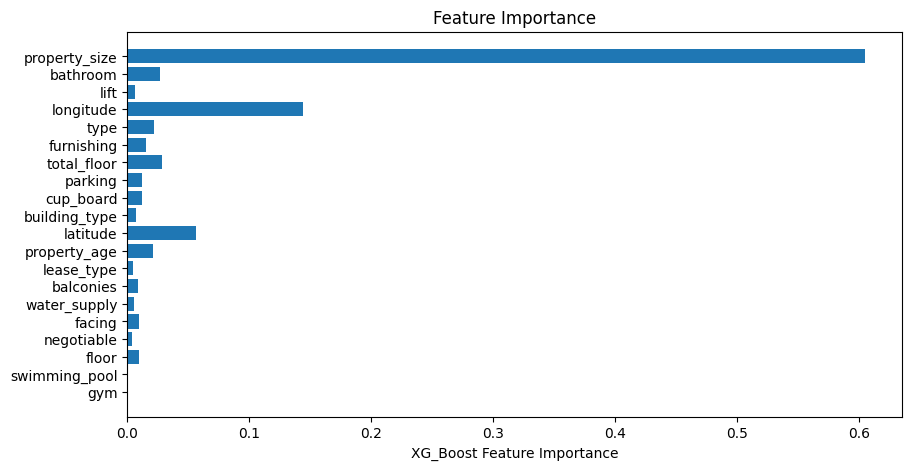

In [81]:
sorted_idx = xgregressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("XG_Boost Feature Importance")
plt.title("Feature Importance")
plt.show()